# PREPROCESADO

In [1]:
import unicodedata
from num2words import num2words
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

En esta parte de la práctica realizaremos una limpieza de las reviws para quedarnos con las palabras relevantes del corpus, eliminando todas aquellas que no aportan información

## 1.- Función de limpieza

Descargamos las listas de nltk

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Definimos las variables

In [3]:
tokenizer = RegexpTokenizer(r'\w+')
stopwordlist = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

Definimos una función que aplicaremos a cada fila del dataframe para limpiar las reviews

In [4]:
def ensure_unicode(text):
    if isinstance(text, str):
        return text
    elif isinstance(text, float) or isinstance(text, int):
        return str(text)

def cleaner(text,tokenizer,stopwordlist,lemmatizer):
    cleanText = []
    text = ensure_unicode(text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    for word in tokenizer.tokenize(text):
        if word not in stopwordlist:
            if word.isdigit():
                cleanText.append(num2words(word))
            else:
                cleanText.append(lemmatizer.lemmatize(word.lower().strip()))
            
    return cleanText
    
    

Comprobamos que la función creada funciona correctamente en una muestra.

In [5]:
df_reviews = pd.read_csv('data/reviews.csv')
#Seleccionamos un texto random para probar el cleaner, de la columna reviewText
text = df_reviews['reviewText'][0]
print(text)
print(cleaner(text,tokenizer,stopwordlist,lemmatizer))

Installing the game was a struggle (because of games for windows live bugs).Some championship races and cars can only be "unlocked" by buying them as an addon to the game. I paid nearly 30 dollars when the game was new. I don't like the idea that I have to keep paying to keep playing.I noticed no improvement in the physics or graphics compared to Dirt 2.I tossed it in the garbage and vowed never to buy another codemasters game. I'm really tired of arcade style rally/racing games anyway.I'll continue to get my fix from Richard Burns Rally, and you should to. :)http://www.amazon.com/Richard-Burns-Rally-PC/dp/B000C97156/ref=sr_1_1?ie=UTF8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallyThank you for reading my review! If you enjoyed it, be sure to rate it as helpful.
['installing', 'game', 'struggle', 'game', 'window', 'live', 'bug', 'some', 'championship', 'race', 'car', 'unlocked', 'buying', 'addon', 'game', 'i', 'paid', 'nearly', 'thirty', 'dollar', 'game', 'new', 'i', 'like', 'id

Aplicamos la función para cada celda del dataframe

In [6]:
df_reviews['cleaned_review'] = df_reviews['reviewText'].apply(lambda x: cleaner(x,tokenizer,stopwordlist,lemmatizer))
df_reviews.head().T

,0,1,2,3,4
reviewText,Installing the game was a struggle (because of...,If you like rally cars get this game you will ...,1st shipment received a book instead of the ga...,"I got this version instead of the PS3 version,...",I had Dirt 2 on Xbox 360 and it was an okay ga...
overall,1.0,4.0,1.0,3.0,4.0
sentiment,Negativas,Positivas,Negativas,Negativas,Positivas
cleaned_review,"[installing, game, struggle, game, window, liv...","[if, like, rally, car, get, game, fun, it, ori...","[1st, shipment, received, book, instead, game,...","[i, got, version, instead, ps3, version, turne...","[i, dirt, two, xbox, three hundred and sixty, ..."


## 2.- Análisis post-procesado

Ahora que hemos realizado un procesado del texto, si podemos hacer algo más de análisis exploratorio

In [7]:
#HAcemos una lista de palabras de la columna cleaned_review de aquellas filas que sean positivas
positive_words = []
negative_words = []
for i in range(len(df_reviews)):
    if df_reviews['overall'][i] >= 4:
        positive_words += df_reviews['cleaned_review'][i]
    else:
        negative_words += df_reviews['cleaned_review'][i]

print(len(positive_words))
print(len(negative_words))


9190749
3220599


### Bigramas

In [8]:
from nltk import ngrams

pos_bigrams = list(ngrams(positive_words, 2))
pos_trigrams = list(ngrams(positive_words, 3))


In [9]:
posbigrams_freq = nltk.FreqDist(pos_bigrams)
posbigrams_freq.most_common(10)

[(('game', 'i'), 22390),
 (('this', 'game'), 18981),
 (('the', 'game'), 14703),
 (('i', 'think'), 8935),
 (('the', 'graphic'), 8729),
 (('i', 'played'), 8677),
 (('game', 'the'), 7978),
 (('i', 'would'), 7953),
 (('great', 'game'), 7525),
 (('game', 'play'), 7263)]

In [10]:
pos_trigrams_freq = nltk.FreqDist(pos_trigrams)
pos_trigrams_freq.most_common(10)

[(('first', 'person', 'shooter'), 1965),
 (('i', 'ever', 'played'), 1927),
 (('game', 'i', 'played'), 1886),
 (('game', 'i', 'ever'), 1727),
 (('i', 'highly', 'recommend'), 1564),
 (('one', 'best', 'game'), 1451),
 (('i', 'love', 'game'), 1352),
 (('game', 'this', 'game'), 1347),
 (('grand', 'theft', 'auto'), 1295),
 (('i', 'played', 'game'), 1147)]

In [11]:
neg_bigrams = list(ngrams(negative_words, 2))
neg_trigrams = list(ngrams(negative_words, 3))

In [12]:
neg_bigrams_freq = nltk.FreqDist(neg_bigrams)
neg_bigrams_freq.most_common(10)

[(('game', 'i'), 8141),
 (('this', 'game'), 5561),
 (('the', 'game'), 5404),
 (('i', 'would'), 3535),
 (('i', 'think'), 3242),
 (('i', 'played'), 2893),
 (('the', 'graphic'), 2873),
 (('game', 'play'), 2674),
 (('game', 'the'), 2632),
 (('i', 'like'), 2296)]

In [13]:
neg_trigrams_freq = nltk.FreqDist(neg_trigrams)
neg_trigrams_freq.most_common(10)


[(('i', 'bought', 'game'), 554),
 (('first', 'person', 'shooter'), 544),
 (('game', 'i', 'played'), 454),
 (('i', 'think', 'i'), 436),
 (('i', 'would', 'recommend'), 410),
 (('i', 'played', 'game'), 406),
 (('i', 'ever', 'played'), 385),
 (('game', 'i', 'ever'), 382),
 (('grand', 'theft', 'auto'), 345),
 (('game', 'this', 'game'), 342)]

In [14]:
#Contamos las palabras unicas de las reviews positivas y negativas
unique_pos = set(positive_words)
unique_neg = set(negative_words)

print(len(unique_pos))
print(len(unique_neg))

112223
60421


In [15]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

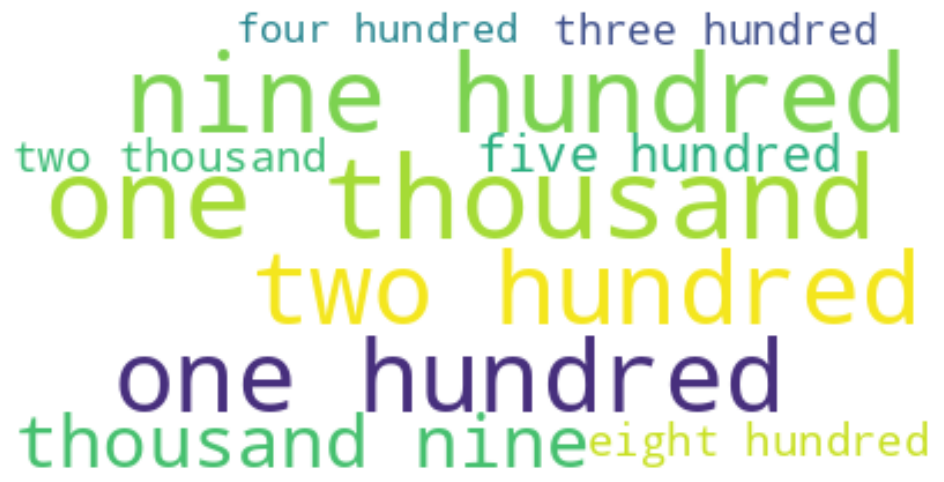

In [16]:
plot_word_cloud(unique_pos)

In [17]:
#añadimos los numeros en ingles a la lista de stopwords
stopwordlist += ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten','thousand','hundred','million']
df_reviews['cleaned_review'] = df_reviews['reviewText'].apply(lambda x: cleaner(x,tokenizer,stopwordlist,lemmatizer))
positive_words = []
negative_words = []
for i in range(len(df_reviews)):
    if df_reviews['overall'][i] >= 4:
        positive_words += df_reviews['cleaned_review'][i]
    else:
        negative_words += df_reviews['cleaned_review'][i]

print(len(positive_words))
print(len(negative_words))

#Contamos las palabras unicas de las reviews positivas y negativas
unique_pos = set(positive_words)
unique_neg = set(negative_words)

print(len(unique_pos))
print(len(unique_neg))

plot_word_cloud(unique_pos)

: 